In [1]:
import pickle
from ggplot import *
import pandas as pd
import numpy as np
% matplotlib inline

/Users/alex/anaconda/envs/wikiquote/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/alex/anaconda/envs/wikiquote/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/alex/anaconda/envs/wikiquote/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
alldata = pickle.load(open('output/dtm_processed_output.p', 'rb'))
term_topic = alldata['term_topic']
doc_topic = alldata['doc_topic']
#doc_length = alldata['doc_length']
#term_frequency = alldata['term_frequency']
terms = alldata['terms']

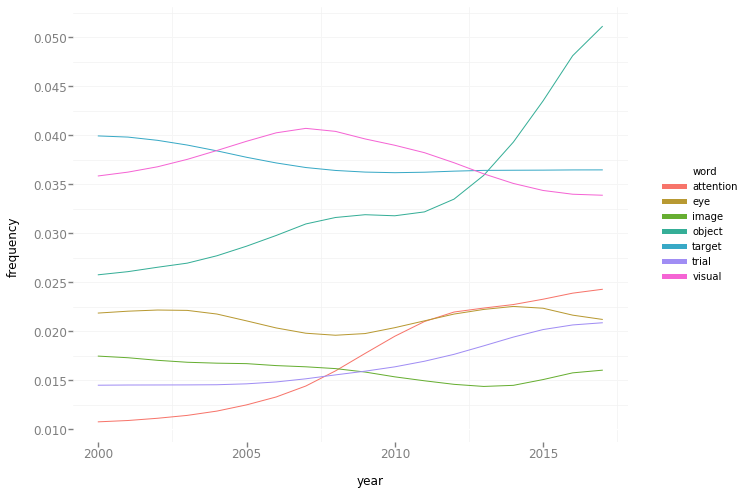

In [3]:
graphs = []
for topic_num in range(20):
    topic_np = term_topic[:,topic_num,:]
    topidx = np.argsort(-topic_np.sum(0))[:7]
    topic_np = topic_np[:,topidx]
    df = pd.DataFrame(topic_np, columns=np.array(terms)[topidx])
    df['year'] = range(2000, 2018)
    df = df.melt(id_vars=['year'], var_name='word', value_name='frequency')
    p = ggplot(aes(x='year', y='frequency', color='word'), data=df) + geom_line() + scale_x_continuous(breaks=[2000, 2005, 2010, 2015]) + theme_bw()
    p.save(filename='topic_graphs/topictopwords{}.png'.format(topic_num))
    graphs.append(p)

Topic Number: 0


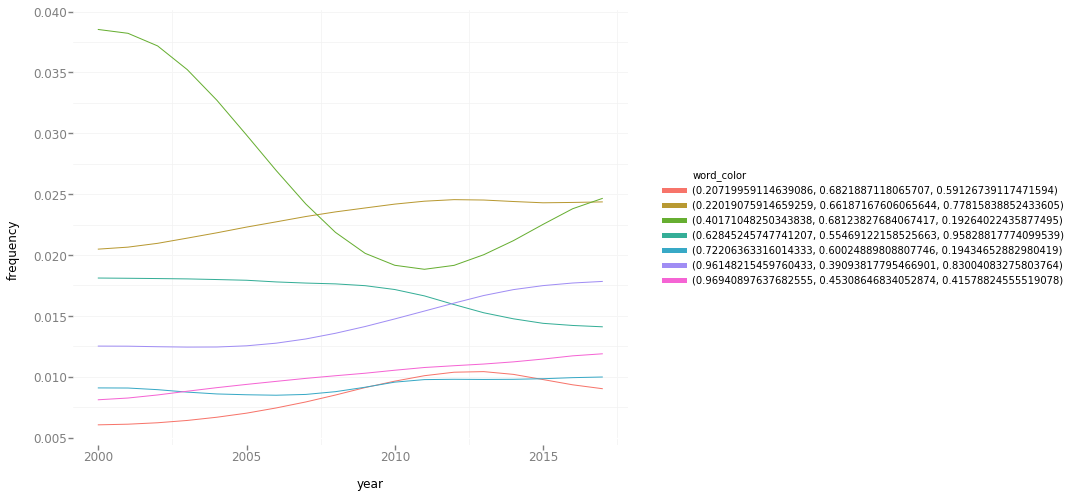

<ggplot: (290151204)>
Topic Number: 1


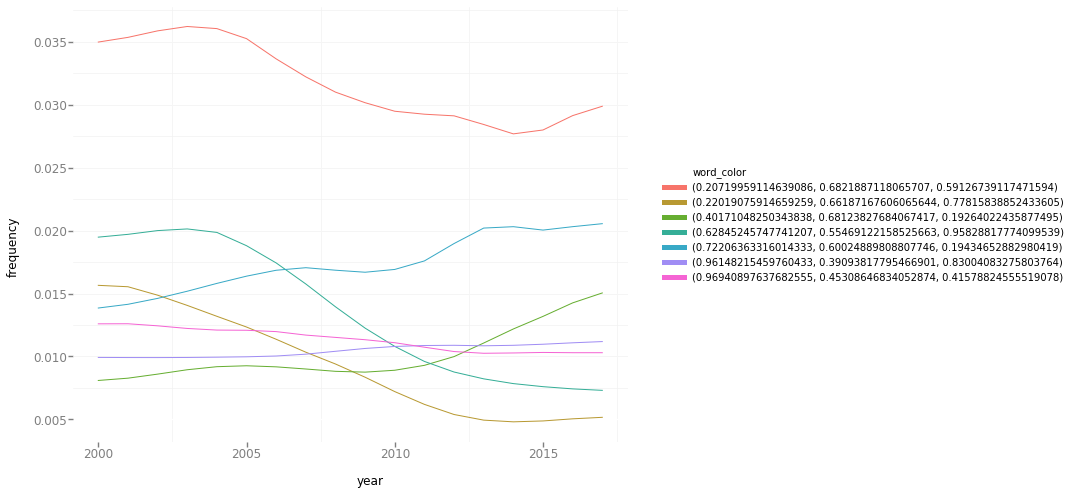

<ggplot: (-9223372036564387640)>
Topic Number: 2


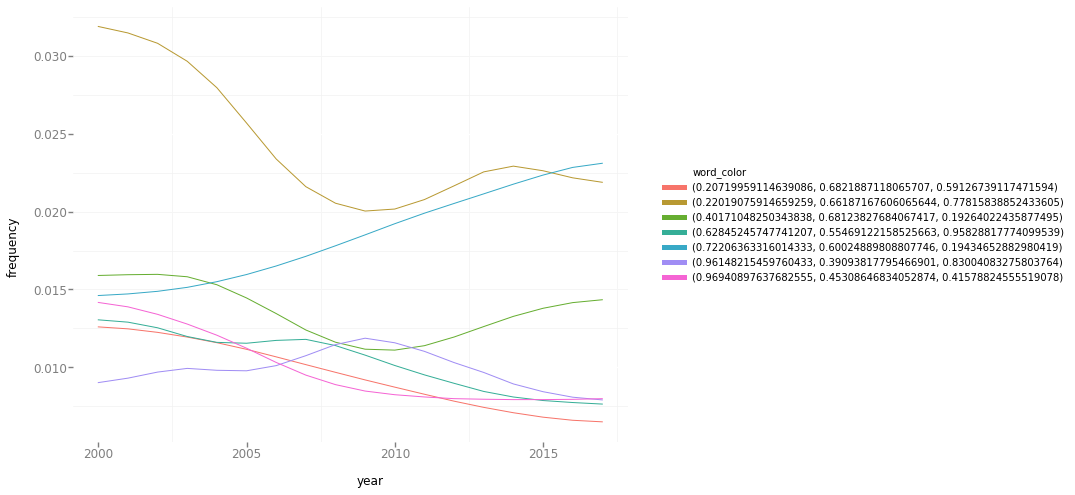

<ggplot: (-9223372036564252423)>
Topic Number: 3


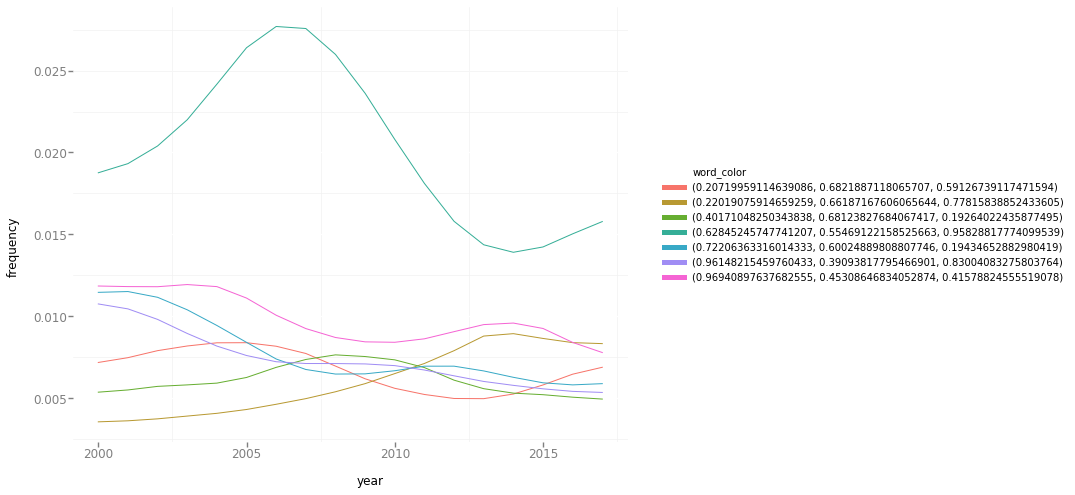

<ggplot: (-9223372036563335420)>
Topic Number: 4


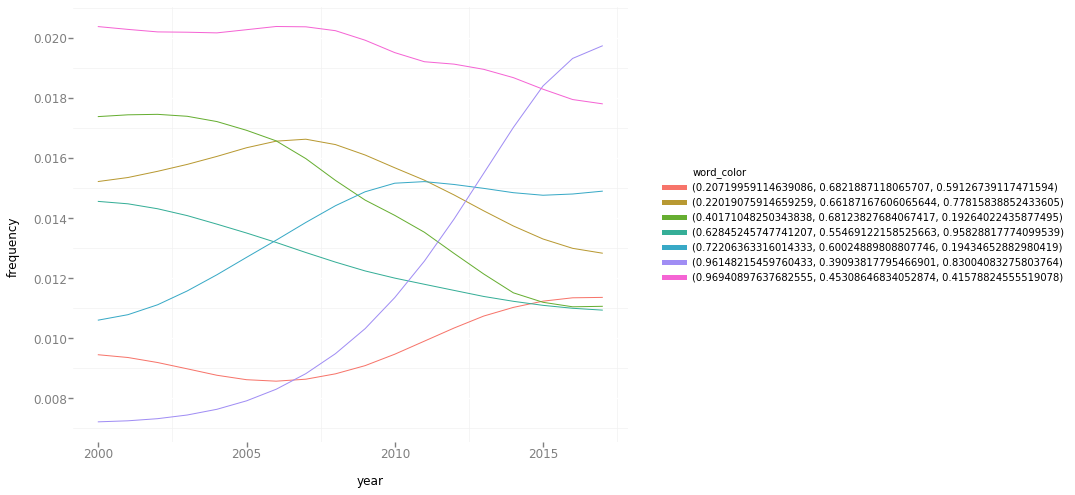

<ggplot: (-9223372036563281485)>
Topic Number: 5


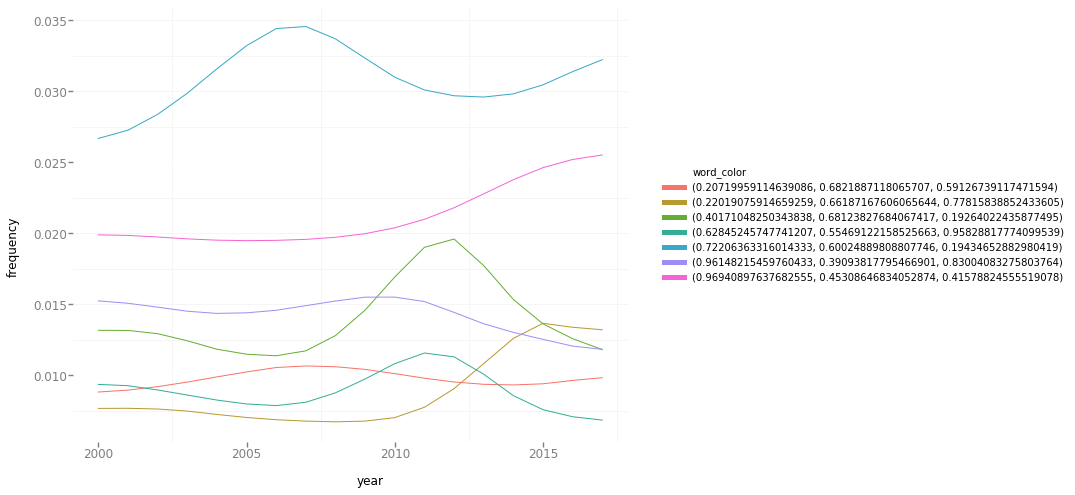

<ggplot: (-9223372036563150048)>
Topic Number: 6


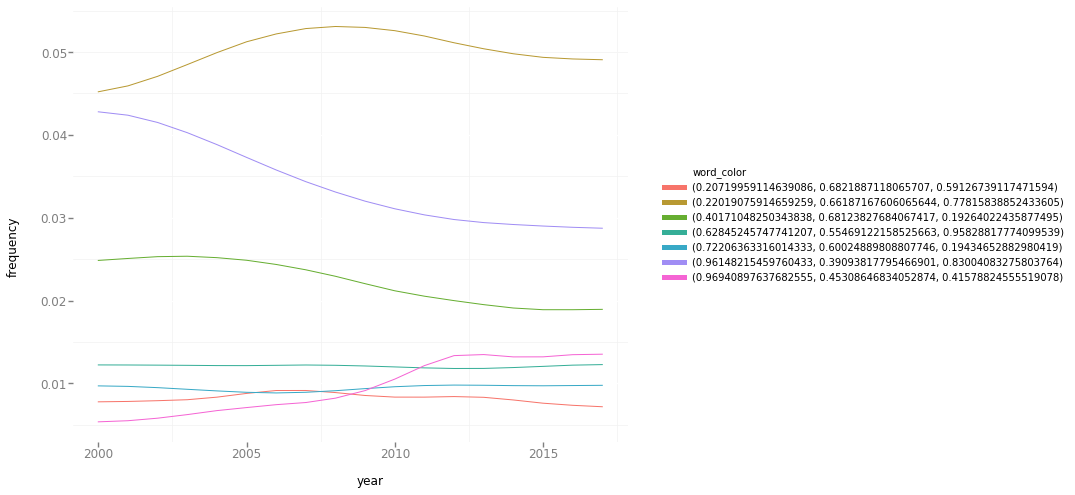

<ggplot: (-9223372036562801611)>
Topic Number: 7


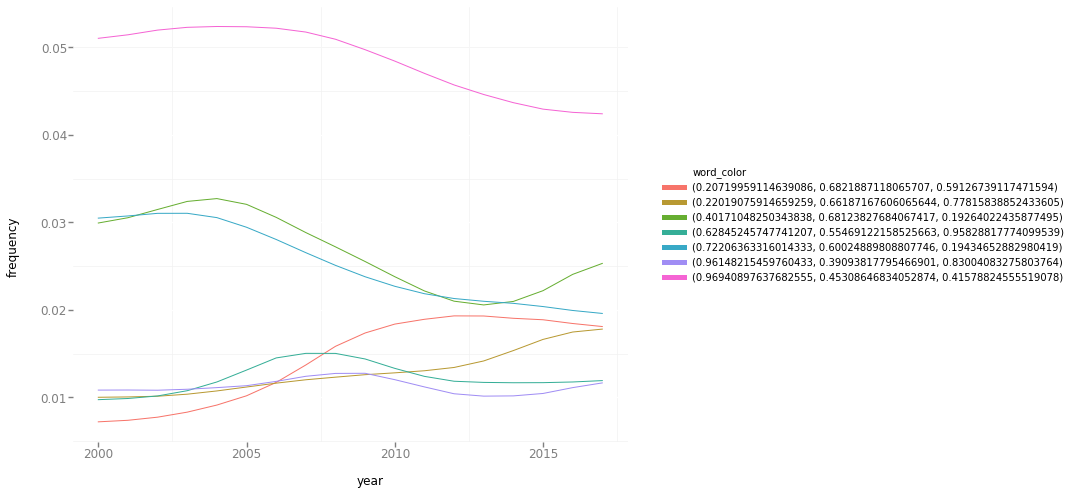

<ggplot: (-9223372036562734269)>
Topic Number: 8


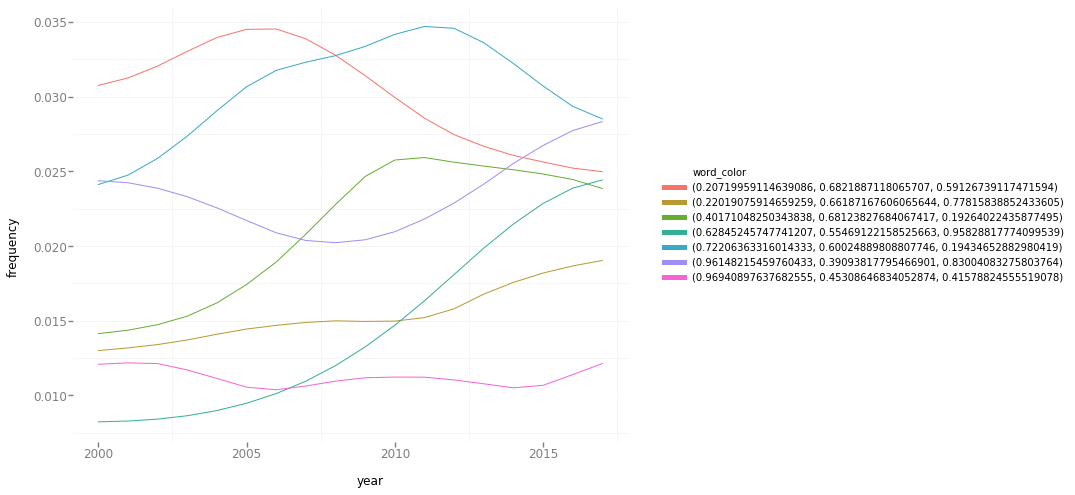

<ggplot: (298820258)>
Topic Number: 9


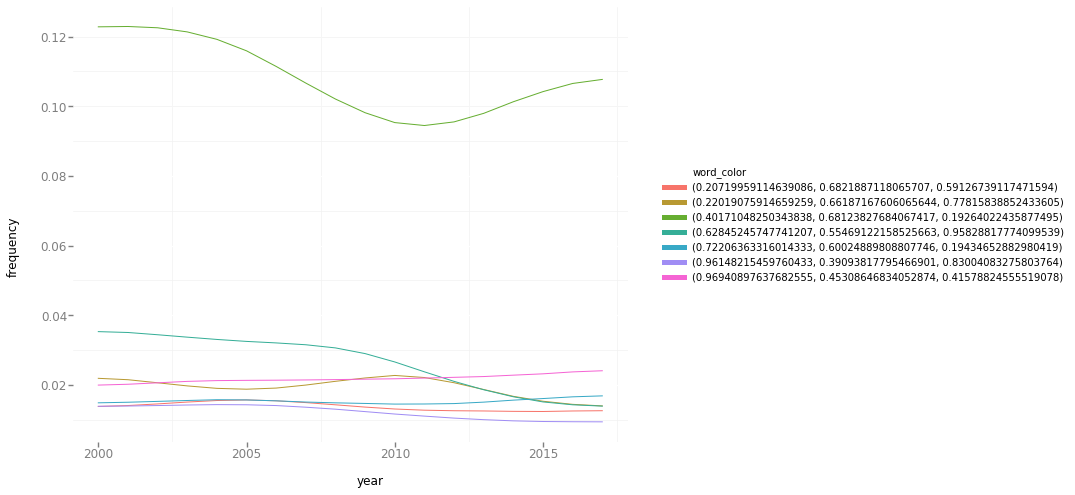

<ggplot: (-9223372036555904368)>
Topic Number: 10


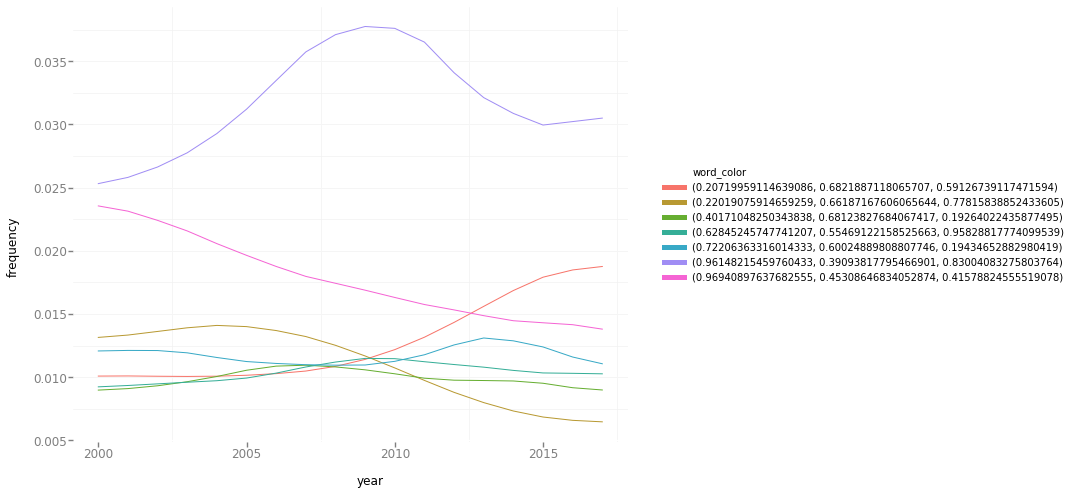

<ggplot: (-9223372036555726483)>
Topic Number: 11


In [ ]:
for i, g in enumerate(graphs):
    print('Topic Number:', i)
    print(g)